In [3]:
cd /home/chenxupeng/projects/deepshape/

/home/chenxupeng/projects/deepshape


In [4]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr
%pylab inline
import argparse, sys, os, errno
sys.path.append('bin')
import numpy as np
import h5py
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import keras as K
import seaborn as sns
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" # so the IDs match nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"] = "5"
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.99
set_session(tf.Session(config=config))
from keras.models import load_model
from keras.utils.generic_utils import get_custom_objects
from unet_128_model_row_column import *

# prepare data 
pictures_540  <br>
and use final_acc.py to test models <br>
note to change save path!

In [ ]:
ic_shape = {}
with h5py.File('known/known.h5') as f:
    for i in tqdm(range(540)):
        ic_shape[i] = f['known'][f['start'][i]:f['end'][i]]
    icshape = np.array([value for (key,value) in ic_shape.iteritems()])
    name = f['name'][:]
with h5py.File('known/known.h5') as f:
    names = f['name'][:]
record_dict = SeqIO.to_dict(SeqIO.parse("known/sequences.fa", "fasta"))
sequences = {}
for i in range(540):
    sequences[i] = record_dict[names[i]].seq.tostring()
class Onehot(object):
    def __init__(self, alphabet='ATCG'):
        self.transtable = np.zeros(128, np.int64)
        self.transtable[[ord(a) for a in alphabet]] = range(len(alphabet))
        self.alphabet = np.frombuffer(alphabet, np.int8)
    def encode(self, seq):
        seq_int = self.transtable[np.frombuffer(seq, np.int8)]
        encoded = np.zeros((len(seq), len(self.alphabet)), np.int8)
        encoded[np.r_[:len(seq)], seq_int] = 1
        return encoded
    def decode(self, a):
        return self.alphabet[np.argmax(a, axis=1)].tostring()
onehot = Onehot()

fillarr = np.repeat(0.25,64*4).reshape(-1,4)

imshow(np.repeat(onehot.encode(sequences[0]),50).reshape(-1,200))
imshow(np.repeat(np.concatenate((fillarr,onehot.encode(sequences[0]),fillarr)),50).reshape(-1,200))
onehotarr = {}
for i in range(540):
    onehotarr[i] = np.concatenate((fillarr,onehot.encode(sequences[i]),fillarr))
def getfrag(data):
    '''
    data: length*4
    frag number: length-128+1
    '''
    number = data.shape[0]-128+1
    arr = np.ndarray([number,128,4])
    for i in range(number):
        arr[i] = data[i:i+128]
    return arr

frags ={}
for i in range(540):
    frags[i] = getfrag(onehotarr[i])
    
def convert_to_image(x):
    m = (np.repeat(x, 4, axis=1)[np.newaxis, :, :]*np.tile(x, 4)[:, np.newaxis, :])
    return m
with h5py.File('known/pictures_540') as f:
    for i in tqdm(range(540)):
        datarr = np.ndarray([len(frags[i]),128,128,16])
        for j in range(len(frags[i])):
            datarr[j] = convert_to_image(frags[i][j])
        f.create_dataset(str(i),data=datarr)
#known/pictures_540
#每个 str(i) 里存着一条序列的所有片段的图片
frags ={}
with h5py.File('known/pictures_540') as f:
    with h5py.File('known/pictures_540_1') as t:
        for i in tqdm(range(540)):
            frags[i] =  f[str(i)][:]
            t.create_dataset(str(i),data = f[str(i)][:-1])

In [7]:
pd.read_csv('output/acc/acc_unet_cdsstride16_4.2')

,Unnamed: 0,2d_model,dense
0,16s,0.511,0.597
1,23s,0.425,0.684
2,5s,0.479,0.628
3,RNaseP,0.471,0.634
4,grp1,0.488,0.587
5,grp2,0.577,0.524
6,srp,0.468,0.578
7,tRNA,0.474,0.563
8,telomerase,0.519,0.555
9,tmRNA,0.490,0.602


In [8]:
pd.read_csv('output/acc/acc_unet_allstride16_4.3_norestrict')

,Unnamed: 0,2d_model,dense
0,16s,0.470,0.597
1,23s,0.549,0.684
2,5s,0.549,0.628
3,RNaseP,0.504,0.634
4,grp1,0.509,0.587
5,grp2,0.410,0.524
6,srp,0.521,0.578
7,tRNA,0.485,0.563
8,telomerase,0.495,0.555
9,tmRNA,0.469,0.602


In [9]:
f = h5py.File('output/acc/acc_unet_allstride16_4.3_norestrictwholeprediction.hdf5')

In [13]:
f['0'][:]

array([[2.2270990e-06, 2.2313766e-06, 2.0345506e-06, ..., 9.9999994e-01,
        9.9999994e-01, 9.9999988e-01],
       [2.2334225e-06, 2.2449051e-06, 2.0478585e-06, ..., 9.9999994e-01,
        9.9999994e-01, 9.9999988e-01],
       [2.2260342e-06, 2.2299737e-06, 2.0324642e-06, ..., 9.9999994e-01,
        9.9999994e-01, 9.9999988e-01],
       ...,
       [1.9455206e-06, 1.8368938e-06, 1.6700352e-06, ..., 9.9999994e-01,
        9.9999994e-01, 9.9999988e-01],
       [2.0150010e-06, 1.9273541e-06, 1.7250745e-06, ..., 9.9999994e-01,
        9.9999994e-01, 9.9999988e-01],
       [1.9068395e-06, 1.8449387e-06, 1.6919971e-06, ..., 9.9999994e-01,
        9.9999994e-01, 9.9999988e-01]], dtype=float32)

In [14]:
predicted = {}
with h5py.File('output/acc/acc_unet_allstride16_4.3_norestrictwholeprediction.hdf5') as f:
    for i in range(540):
        predicted[i] = f[str(i)][:,:128]
prearr ={}
for j in range(540):
    prearr[j] = np.ndarray([predicted[j].shape[0],128+predicted[j].shape[0]])
    for i in range(predicted[j].shape[0]):
        prearr[j][i] = np.concatenate((np.zeros(i).reshape(-1,1),predicted[j][i].reshape(-1,1),np.zeros(predicted[j].shape[0]-i).reshape(-1,1))).ravel()

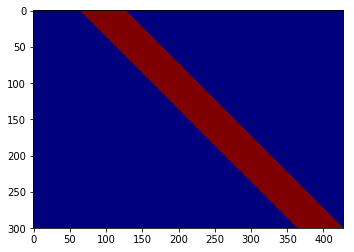

In [17]:
imshow(prearr[100],cmap='jet')

In [28]:
pd.read_csv('output/acc/acc_unet_unet_allstride16_4.3_restrict.hdf5')

,Unnamed: 0,2d_model,dense
0,16s,0.562,0.597
1,23s,0.431,0.684
2,5s,0.468,0.628
3,RNaseP,0.466,0.634
4,grp1,0.510,0.587
5,grp2,0.644,0.524
6,srp,0.458,0.578
7,tRNA,0.471,0.563
8,telomerase,0.560,0.555
9,tmRNA,0.493,0.602


In [29]:
predicted = {}
with h5py.File('output/acc/acc_unet_unet_allstride16_4.3_restrict.hdf5wholeprediction.hdf5') as f:
    for i in range(540):
        predicted[i] = f[str(i)][:,:128]
prearr ={}
for j in range(540):
    prearr[j] = np.ndarray([predicted[j].shape[0],128+predicted[j].shape[0]])
    for i in range(predicted[j].shape[0]):
        prearr[j][i] = np.concatenate((np.zeros(i).reshape(-1,1),predicted[j][i].reshape(-1,1),np.zeros(predicted[j].shape[0]-i).reshape(-1,1))).ravel()

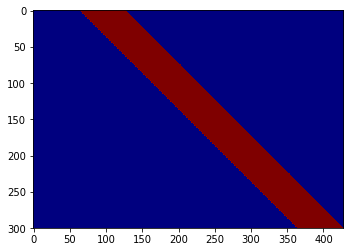

In [30]:
imshow(prearr[100],cmap='jet')

In [5]:
pd.read_csv('output/acc/acc_unet_allstride1_4.4_restrict')

,Unnamed: 0,2d_model,dense
0,16s,0.426,0.597
1,23s,0.369,0.684
2,5s,0.404,0.628
3,RNaseP,0.413,0.634
4,grp1,0.428,0.587
5,grp2,0.530,0.524
6,srp,0.409,0.578
7,tRNA,0.501,0.563
8,telomerase,0.459,0.555
9,tmRNA,0.429,0.602


In [6]:
predicted = {}
with h5py.File('output/acc/acc_unet_allstride1_4.4_restrictwholeprediction.hdf5') as f:
    for i in range(540):
        predicted[i] = f[str(i)][:,:128]
prearr ={}
for j in range(540):
    prearr[j] = np.ndarray([predicted[j].shape[0],128+predicted[j].shape[0]])
    for i in range(predicted[j].shape[0]):
        prearr[j][i] = np.concatenate((np.zeros(i).reshape(-1,1),predicted[j][i].reshape(-1,1),np.zeros(predicted[j].shape[0]-i).reshape(-1,1))).ravel()

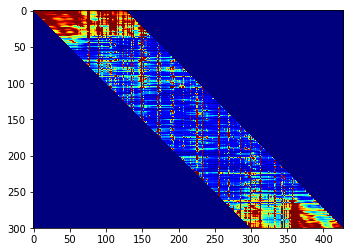

In [7]:
imshow(prearr[100],cmap='jet')